In [2]:
from keras.models import load_model
from keras.metrics import MeanIoU
from custom_func import imageLoader
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# path
BASE_PATH = "C:/Users/ygrae/Desktop/BRATS2020/BraTS2020_TrainingData/input_data128/"
MODEL_PATH  = 'C:/Users/ygrae/Desktop/BRATS2020/brats_3d.keras'

# validation parameters
BATCH_SIZE = 8 

In [4]:
# define validation directories
val_img_dir = os.path.join(BASE_PATH,'val/images/')
val_mask_dir = os.path.join(BASE_PATH,'val/masks/')

# create list of validation directories
val_img_list= os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [5]:
# load model
my_model = load_model(MODEL_PATH, 
                      compile=False)

#Verify IoU on a batch of images from the test dataset using built in keras function for IoU
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, BATCH_SIZE)

#Verify generator
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Mean IoU = 0.43859056


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


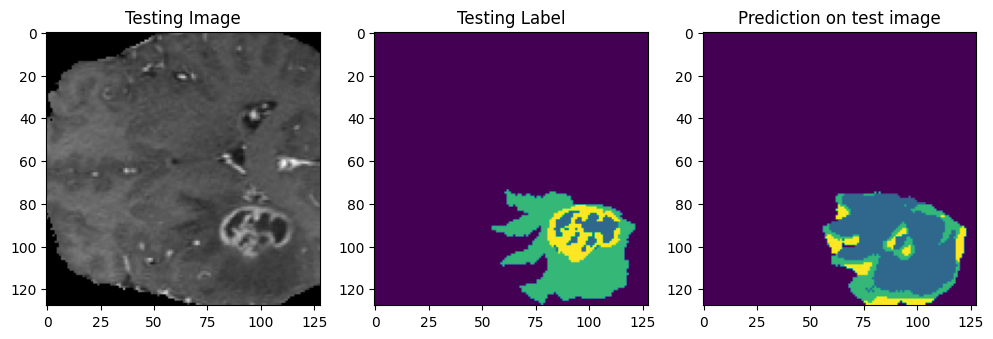

In [7]:
# predictions on test images on at a time
img_num = 82

test_img = np.load(BASE_PATH+'/val/images/image_'+str(img_num)+'.npy')
test_mask = np.load(BASE_PATH+'/val/masks/mask_'+str(img_num)+'.npy')
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

# plot individual slices from test predictions for verification
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()